# Handling Missing Values
### Methods to handle missing values:
1. Imputation (Use for smaller datasets)
2. Dropping (Use only when dataset is huge)

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset to Pandas dataframe

dataset = pd.read_csv('Placement_Dataset.csv')

In [4]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
dataset.shape

(215, 15)

In [6]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#### Central tendencies:
1. **Mean**: Average of all the data
2. **Median**: Middle element of the data arranged in ascending order and in case of even number of elements, average of the middle two elements
3. **Mode**: Element with maximum occurence

### Imputation

#### Analyze the distribution of data in the salary column

/tmp/ipykernel_29214/3056948362.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.salary)


<AxesSubplot:xlabel='salary', ylabel='Density'>

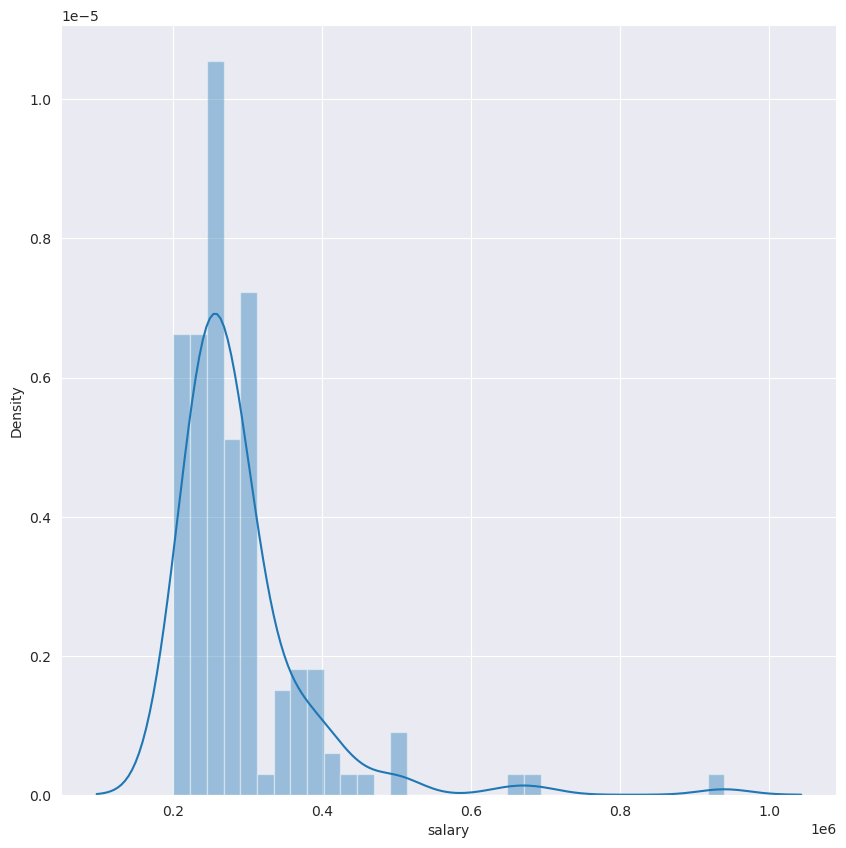

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(dataset.salary)

**In skew distribution like this, we cannot use mean, but instead will use either median or mode**

#### Replace the missing values with median

In [10]:
dataset['salary'].fillna(dataset['salary'].median(), inplace=True)

To fill the missing values with **mean** or **mode**

```python
dataset['salary'].fillna(dataset['salary'].mean(), inplace=True)
```
or
```python
dataset['salary'].fillna(dataset['salary'].mode(), inplace=True)
```

In [12]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### Dropping values

In [13]:
salary_dataset = pd.read_csv('Placement_Dataset.csv')
salary_dataset.shape

(215, 15)

In [14]:
salary_dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [15]:
# drop the missing values
salary_dataset = salary_dataset.dropna(how='any')

In [16]:
print(salary_dataset.shape)
salary_dataset.isnull().sum()

(148, 15)


sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64